# Pizza Sales Data Analysis

We have given a dataset of pizza sales. We have to analyze the data and answer the following questions and also visualize the data.:
 - Total revenue : The sum of the total price of all pizza orders.
 - Average order value : The average amount spent on a pizza order, calculated as the total revenue divided by the total number of orders.
 - Total orders : The total number of pizza orders.
 - Avarage price per order : The average price of a pizza order, calculated as the total revenue divided by the total number of orders.
 - Total pizzas sold : The total number of pizzas sold.
 - Top 5 pizzas : The top 5 pizzas that generated the most revenue.
 - Bottom 5 pizzas : The bottom 5 pizzas that generated the least revenue.

Chart requirments:
We would like to visualize aspects of our pizza sales data to gain insights and understand key trands .We have identified the following requirments for creating charts:
- Daily trend for total orders:
         Create a bar chart that displays the daily trend of total orders over a specific time period. This chart will
         help us identify any patterns or fluctuations in order volumes on a daily basis.
- Monthly trend for total revenue:
         Create a line chart that displays the monthly trend of total revenue over a specific time period. This chart will
         help us understand how revenue has changed over time and identify any seasonal patterns.
- Hourly trend for total orders:
         Create a line chart that displays the hourly trend of total orders over a specific time period. This chart will
         help us identify peak ordering hours and understand customer behavior throughout the day.
- Percentage sales by pizza type:
         Create a pie chart that displays the percentage sales contribution of each pizza type to the total revenue. This
         chart will help us understand which pizza types are most popular among customers.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pizza_sales.csv")
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  01-01-2015   11:38:36   
1         2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2         3         2  five_cheese_l         1  01-01-2015   11:57:40   
3         4         2    ital_supr_l         1  01-01-2015   11:57:40   
4         5         2     mexicana_m         1  01-01-2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   


#### Total revenue

In [3]:
Sum=df['total_price'].sum()
print(Sum)

817860.05


##### So the total revenue is 817860.05

In [4]:
total_orders=df['order_id'].nunique()
print(total_orders)

21350


##### Total number of orders is 21350

#### Avalage order value

In [5]:
avg_order_value = Sum / total_orders
print(f"{avg_order_value:.2f}")

38.31


So, avarage order value is $38.31

#### Total pizzas sold 

In [6]:
number_of_pizzas = df['pizza_id'].count()
print(number_of_pizzas)

48620


So the total pizzas sold is  48620

#### Top 5 pizzas category

In [7]:
list_of_top_pizzas = df['total_price'].groupby(df['pizza_name']).sum().sort_values(ascending=False).head(5)
top_pizza_names = list_of_top_pizzas.index.tolist()
print(top_pizza_names)

['The Thai Chicken Pizza', 'The Barbecue Chicken Pizza', 'The California Chicken Pizza', 'The Classic Deluxe Pizza', 'The Spicy Italian Pizza']


Top 5 pizzas category are:
  'The Thai Chicken Pizza', 'The Barbecue Chicken Pizza', 'The California Chicken Pizza', 'The Classic Deluxe Pizza', 'The Spicy Italian Pizza'

#### Bottom 5 pizzas category

In [8]:
list_of_top_pizzas = df['total_price'].groupby(df['pizza_name']).sum().sort_values().head(5)
# print(list_of_top_pizzas)
top_pizza_names = list_of_top_pizzas.index.tolist()
print(top_pizza_names)

['The Brie Carre Pizza', 'The Green Garden Pizza', 'The Spinach Supreme Pizza', 'The Mediterranean Pizza', 'The Spinach Pesto Pizza']


Bottom 5 pizzas category are:
'The Brie Carre Pizza', 'The Green Garden Pizza', 'The Spinach Supreme Pizza', 'The Mediterranean Pizza', 'The Spinach Pesto Pizza'

## Chart visualization

#### Daily trend for total orders

We can find daily trend for total orders in two ways. One is by using bar chart and another is by using line chart. Here we are using bar chart to find daily trend for total orders.

 In line chat we can find the trend of total orders over a specific time period. This chart will help us identify any patterns or fluctuations in order volumes on a daily basis.

 In a bar chart, we can analyze the daily trend of total orders over a specific time period. Here, we examine which weekday (Monday–Sunday) has the highest or lowest number of orders.

Line chart for daily trend

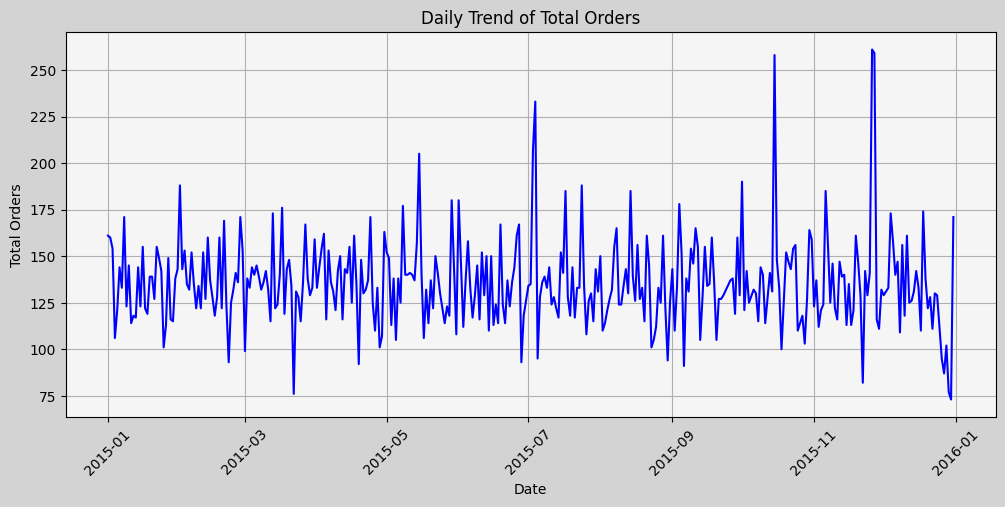

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
daily_orders = df.groupby('order_date')['pizza_id'].count()
fig, ax = plt.subplots(figsize=(12,5))
ax.set_facecolor('whitesmoke')  
fig.patch.set_facecolor('lightgray')  
ax.plot(daily_orders.index, daily_orders.values, linestyle='-', color='b' )
ax.set_xlabel('Date')
ax.set_ylabel('Total Orders')
ax.set_title('Daily Trend of Total Orders')
plt.xticks(rotation=45)
ax.grid(True) 
plt.savefig('chart_bg.png', transparent=False, facecolor=fig.get_facecolor())
plt.show()


Bar chart for Daily trend

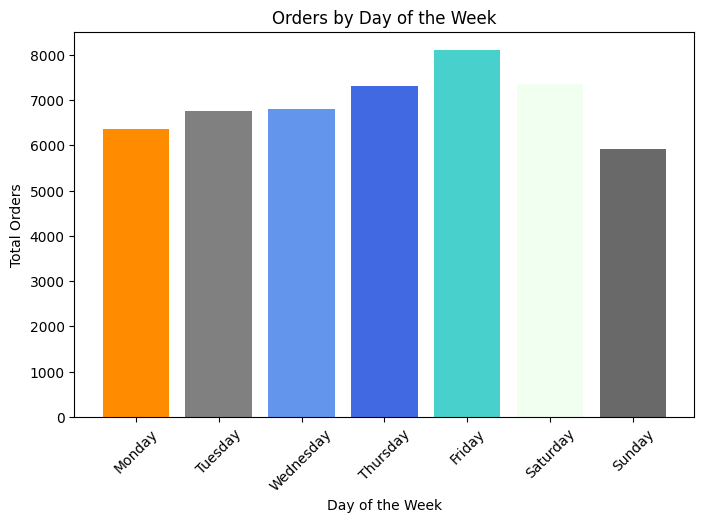

In [10]:
import matplotlib.colors as mcolors

df['day_of_week'] = df['order_date'].dt.day_name()
weekday_orders = df.groupby('day_of_week')['pizza_id'].count()
weekday_orders = weekday_orders.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
random_colors = np.random.choice(list(mcolors.CSS4_COLORS.values()), len(weekday_orders))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(weekday_orders.index, weekday_orders.values, color=random_colors)

# Labels and Title
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.title('Orders by Day of the Week')
plt.xticks(rotation=45)
plt.show()

#### Monthly trend for total revenue

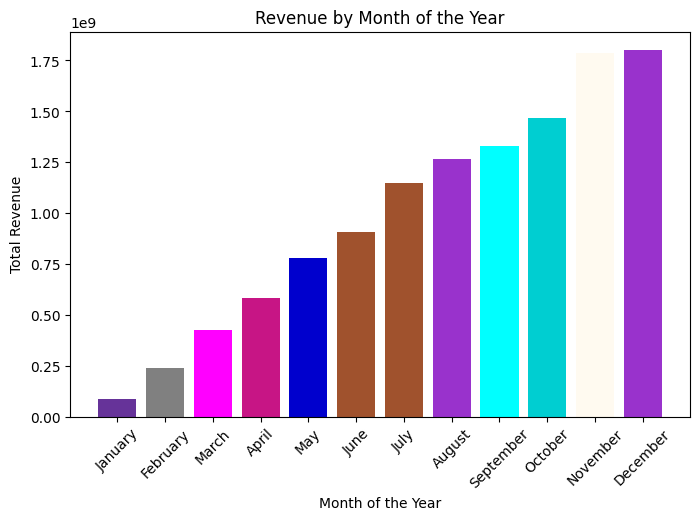

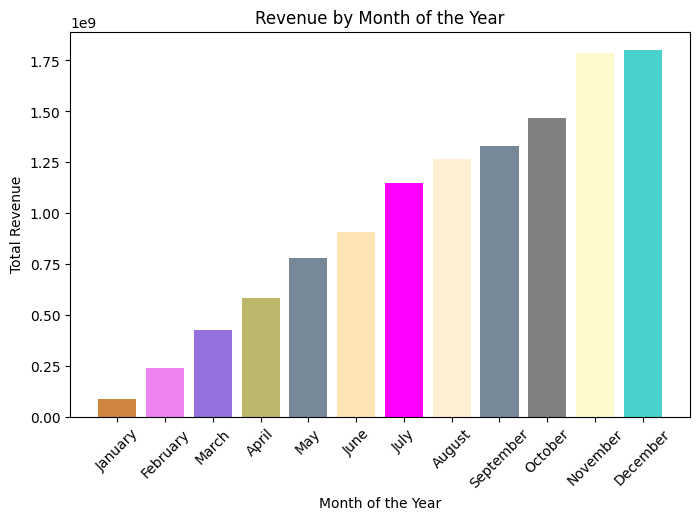

In [11]:
import matplotlib.colors as mcolors

price_per_pizza = 10  # Example price per pizza
df['total_price'] = df['pizza_id'] * price_per_pizza

df['month_of_year'] = df['order_date'].dt.month_name()
month_revenue = df.groupby('month_of_year')['total_price'].sum()
month_revenue = month_revenue.reindex([
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])

# Generate exactly 12 random colors (one per month)
random_colors = np.random.choice(list(mcolors.CSS4_COLORS.values()), len(month_revenue))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(month_revenue.index, month_revenue.values, color=random_colors)

# Labels and Title
plt.xlabel('Month of the Year')
plt.ylabel('Total Revenue')
plt.title('Revenue by Month of the Year')
plt.xticks(rotation=45)
plt.show()

# Assuming total_price is calculated as pizza_id * some_price_per_pizza
# Here, we will use a dummy price per pizza for demonstration purposes
price_per_pizza = 10  # Example price per pizza
df['total_price'] = df['pizza_id'] * price_per_pizza

df['month_of_year'] = df['order_date'].dt.month_name()
month_revenue = df.groupby('month_of_year')['total_price'].sum()
month_revenue = month_revenue.reindex([
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
])

# Generate exactly 12 random colors (one per month)
random_colors = np.random.choice(list(mcolors.CSS4_COLORS.values()), len(month_revenue))

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(month_revenue.index, month_revenue.values, color=random_colors)

# Labels and Title
plt.xlabel('Month of the Year')
plt.ylabel('Total Revenue')
plt.title('Revenue by Month of the Year')
plt.xticks(rotation=45)
plt.show()

#### Hourly trend

hour
11    3
12    2
13    1
Name: pizza_id, dtype: int64


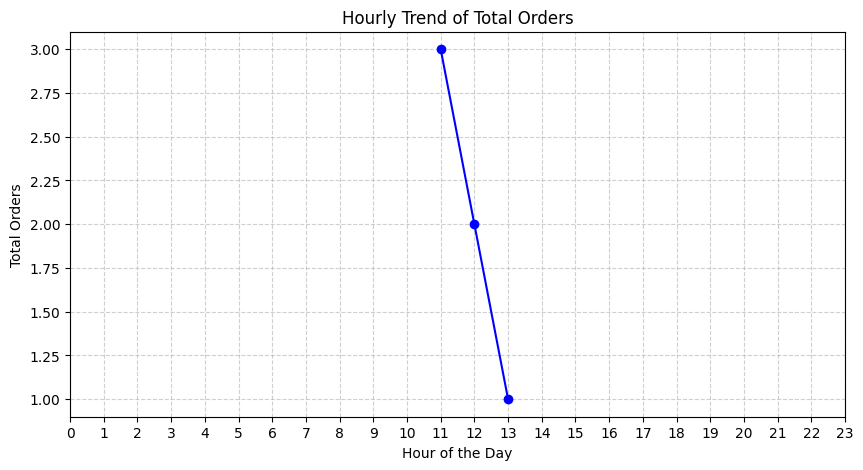

In [22]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['hour'] = df['order_time'].dt.hour
hourly_orders = df.groupby('hour')['pizza_id'].count()
print(hourly_orders)
plt.figure(figsize=(10, 5))
plt.plot(hourly_orders.index, hourly_orders.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.title('Hourly Trend of Total Orders')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


In [ ]:
print(df.head(5))


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25           10          M        Classic   
1       16.00           20          M        Classic   
2       18.50           30          L         Veggie   
3       20.75           40          L        Supreme   
4       16.00           50          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal